<a href="https://colab.research.google.com/github/Batman511/Numerical_methods_5sem/blob/main/%D0%A7%D0%B8%D1%81%D0%BB%D0%B0%D0%BA%D0%B8_5%D0%BB%D0%B0%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Численное решение задач Коши ОДУ 

In [2]:
# Нормальная форма Коши
# u'' = -tg(x)u' + 2x*u/cos(x) + 2 - 2x^3/cosx
# u2 = u'
# u2' = -tg(x)u2 + 2x*u/cos(x) + 2 - 2x^3/cosx
def odu(x, mass_u_u2):
  result = -np.tan(x)*mass_u_u2[1][0] + 2*x*mass_u_u2[0][0]/np.cos(x) + 2 - 2*x**3/np.cos(x)
  return result

def solution(x):
  return np.sin(x)+x**2


START = 0
FINISH = 1
mass_u_u2 = np.array([[0], [1]])

# если хотим задать h
h = 0.01
N = int((FINISH-START)//h)+2

start_x = np.linspace(START, FINISH, N)
start_y = solution( start_x )

## Метод Эйлера

In [3]:
def Euler(odu, start_x, mass_u_u2):
    h = start_x[3] - start_x[2] 
    axis_y = []
    axis_y.append(mass_u_u2[0][0])

    for i in range(1,len(start_x)):
      mass_u_u2 = mass_u_u2 + h * np.array( [[ mass_u_u2[1][0] ], [ odu(start_x[i-1],mass_u_u2) ]] )
      axis_y.append(mass_u_u2[0][0])
    return axis_y

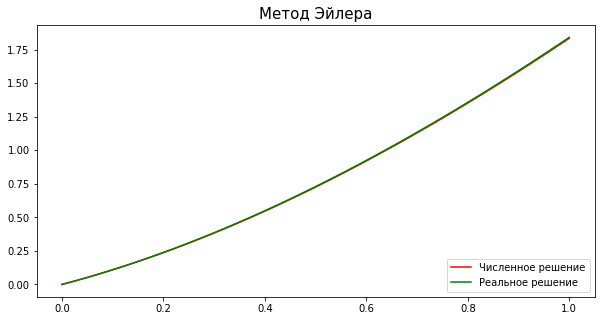

In [4]:
y_euler = Euler(odu, start_x, mass_u_u2)

fig = plt.figure(figsize=(10,5))

ax_real = fig.add_subplot()
ax_real.set_title("Метод Эйлера", fontsize=15)
ax_real.plot(start_x, y_euler, c='red', label="Численное решение")
ax_real.plot(start_x, start_y, c='green', label="Реальное решение")
ax_real.legend(loc='lower right')
# plt.yscale('log')

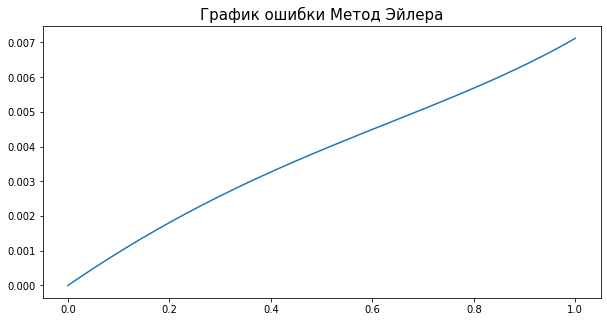

In [5]:
loss_euler = []
for i in range(len(start_x)):
    loss_euler.append(abs(start_y[i]-y_euler[i]))
    
fig = plt.figure(figsize=(10,5))
ax_real = fig.add_subplot()
ax_real.set_title("График ошибки Метод Эйлера", fontsize=15)
ax_real.plot(start_x, loss_euler)

## Метод Гюна

In [ ]:
def Gyun(odu, start_x, mass_u_u2):
    h = start_x[3] - start_x[2] 
    axis_y = []
    axis_y.append(mass_u_u2[0][0])

    for i in range(1,len(start_x)):
      K1_u_u2 = mass_u_u2 + h * np.array( [[ mass_u_u2[1][0] ], [ odu(start_x[i-1],mass_u_u2) ]] )
      mass_u_u2 = mass_u_u2 + h / 2 *( np.array([[ mass_u_u2[1][0] ], [ odu(start_x[i-1],mass_u_u2) ]]) + np.array([[ K1_u_u2[1][0] ], [ odu(start_x[i],K1_u_u2) ]])  )
      axis_y.append(mass_u_u2[0][0])

    return axis_y

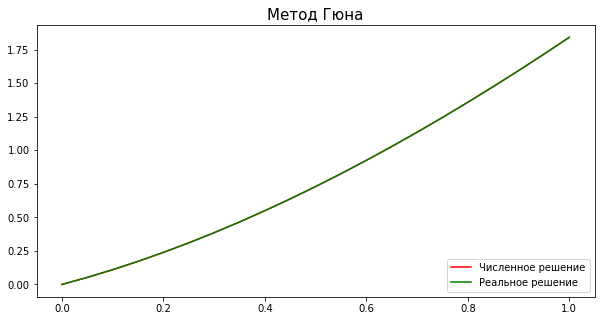

In [ ]:
y_gyun = Gyun(odu, start_x, mass_u_u2)

fig = plt.figure(figsize=(10,5))

ax_real = fig.add_subplot()
ax_real.set_title("Метод Гюна", fontsize=15)
ax_real.plot(start_x, y_gyun, c='red', label="Численное решение")
ax_real.plot(start_x, start_y, c='green', label="Реальное решение")
ax_real.legend(loc='lower right')

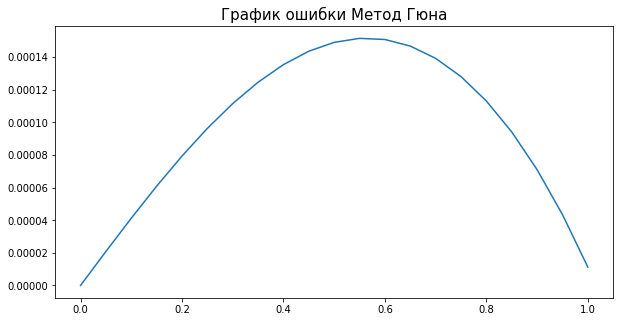

In [ ]:
loss_gyun = []
for i in range(len(start_x)):
    loss_gyun.append(abs(start_y[i]-y_gyun[i]))
    
fig = plt.figure(figsize=(10,5))
ax_real = fig.add_subplot()
ax_real.set_title("График ошибки Метод Гюна", fontsize=15)
ax_real.plot(start_x, loss_gyun)

## Метод Адамса 3 порядка

In [6]:
def Adams_3(odu, start_x, mass_u_u2):
    h = start_x[3] - start_x[2] 
    u2 = np.zeros(len(start_x))
    u = np.zeros(len(start_x))

    u[0:3] = Runge_K_4(odu, start_x[:4], mass_u_u2)[0][:3]
    u2[0:3] = Runge_K_4(odu, start_x[:4], mass_u_u2)[1][:3]

    for i in range(3,len(start_x)):
        K1 = odu( start_x[i-1], np.array([[u[i-1]], [u2[i-1]]]) )
        q1 = u2[i - 1] 

        K2 = odu( start_x[i-2], np.array([[u[i-2]], [u2[i-2]]]) )
        q2 = u2[i - 2] 

        K3 = odu( start_x[i-3], np.array([[u[i-3]], [u2[i-3]]]) )
        q3 = u2[i - 3] 

        u2[i] = u2[i - 1] + h*(23/12*K1 - 4/3*K2 + 5/12*K3)
        u[i] = u[i - 1] + h*(23/12*q1 - 4/3*q2 + 5/12*q3)
 
    return u

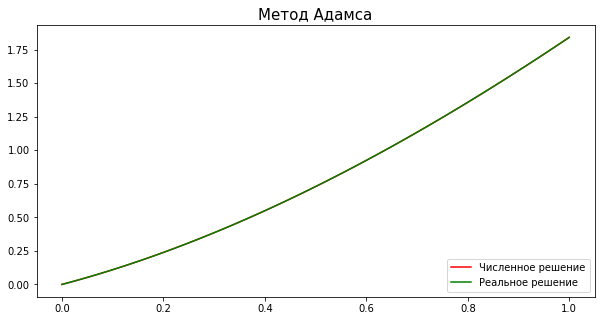

In [13]:
y_adams_3 = Adams_3(odu, start_x, mass_u_u2)

fig = plt.figure(figsize=(10,5))

ax_real = fig.add_subplot()
ax_real.set_title("Метод Адамса", fontsize=15)
ax_real.plot(start_x, y_adams_3, c='red', label="Численное решение")
ax_real.plot(start_x, start_y, c='green', label="Реальное решение")
ax_real.legend(loc='lower right')

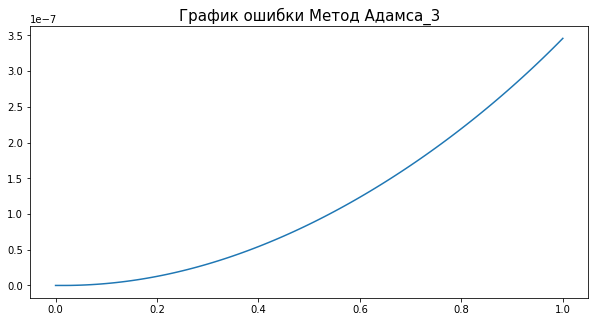

In [14]:
loss_adams_3 = []
for i in range(len(start_x)):
    loss_adams_3.append(abs(start_y[i]-y_adams_3[i]))
    
fig = plt.figure(figsize=(10,5))
ax_real = fig.add_subplot()
ax_real.set_title("График ошибки Метод Адамса_3", fontsize=15)
ax_real.plot(start_x, loss_adams_3)

## Метод Адамса 4 порядка

In [15]:
def Adams_4(odu, start_x, mass_u_u2):
    h = start_x[3] - start_x[2] 
    u2 = np.zeros(len(start_x))
    u = np.zeros(len(start_x))

    u[0:4] = Runge_K_4(odu, start_x[:4], mass_u_u2)[0][:4]
    u2[0:4] = Runge_K_4(odu, start_x[:4], mass_u_u2)[1][:4]

    for i in range(4,len(start_x)):
        K1 = odu( start_x[i-1], np.array([[u[i-1]], [u2[i-1]]]) )
        q1 = u2[i - 1] 

        K2 = odu( start_x[i-2], np.array([[u[i-2]], [u2[i-2]]]) )
        q2 = u2[i - 2] 

        K3 = odu( start_x[i-3], np.array([[u[i-3]], [u2[i-3]]]) )
        q3 = u2[i - 3] 

        K4 = odu( start_x[i-4], np.array([[u[i-4]], [u2[i-4]]]) )
        q4 = u2[i - 4] 

        u2[i] = u2[i - 1] + h*(55/24*K1 - 59/24*K2 + 37/24*K3 - 3/8*K4)
        u[i] = u[i - 1] + h*(55/24*q1 - 59/24*q2 + 37/24*q3 - 3/8*q4)
 
    return u

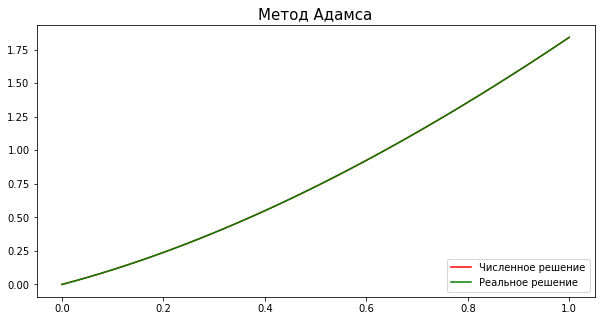

In [16]:
y_adams_4 = Adams_4(odu, start_x, mass_u_u2)

fig = plt.figure(figsize=(10,5))

ax_real = fig.add_subplot()
ax_real.set_title("Метод Адамса", fontsize=15)
ax_real.plot(start_x, y_adams_4, c='red', label="Численное решение")
ax_real.plot(start_x, start_y, c='green', label="Реальное решение")
ax_real.legend(loc='lower right')

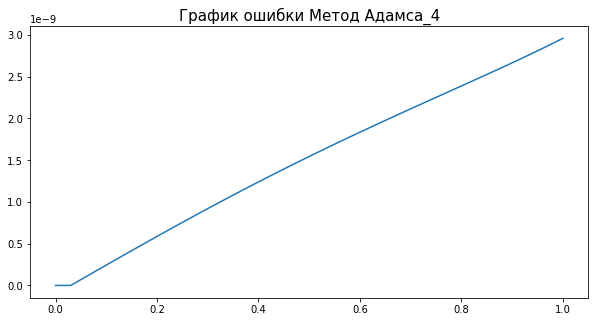

In [17]:
loss_adams_4 = []
for i in range(len(start_x)):
    loss_adams_4.append(abs(start_y[i]-y_adams_4[i]))
    
fig = plt.figure(figsize=(10,5))
ax_real = fig.add_subplot()
ax_real.set_title("График ошибки Метод Адамса_4", fontsize=15)
ax_real.plot(start_x, loss_adams_4)

Сравнение Метода Адамса 3 и 4 порядка

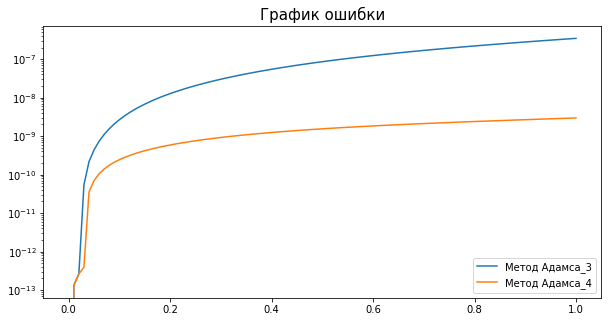

In [18]:
loss_adams_3 = []
loss_adams_4 = []
for i in range(len(start_x)):
    loss_adams_3.append(abs(start_y[i]-y_adams_3[i]))
    loss_adams_4.append(abs(start_y[i]-y_adams_4[i]))
    
fig = plt.figure(figsize=(10,5))
ax_real = fig.add_subplot()
ax_real.set_title("График ошибки", fontsize=15)
ax_real.plot(start_x, loss_adams_3, label="Метод Адамса_3")
ax_real.plot(start_x, loss_adams_4, label="Метод Адамса_4")
ax_real.legend(loc='lower right')
plt.yscale('log')

## Метод Рунге-Кутты 4 порядка

In [10]:
def Runge_K_4(odu, start_x, mass_u_u2):
    h = start_x[3] - start_x[2]
    u = np.zeros(len(start_x))
    u2 = np.zeros(len(start_x)) 
    u[0] = mass_u_u2[0][0]
    u2[0] = mass_u_u2[1][0]

    for i in range(1,len(start_x)):
      K1 = odu( start_x[i-1], np.array([[u[i-1]], [u2[i-1]]]) )
      q1 = u2[i - 1]

      K2 = odu( start_x[i-1] + h/2, np.array([[u[i-1] + h/2*q1], [u2[i-1] + h/2*K1]]) )
      q2 = u2[i - 1] + h/2*K1

      K3 = odu( start_x[i-1] + h/2, np.array([[u[i-1] + h/2*q2], [u2[i-1] + h/2*K2]]) )
      q3 = u2[i - 1] + h/2*K2

      K4 = odu( start_x[i-1] + h, np.array([[u[i-1] + h*q3], [u2[i-1] + h*K3]]) )
      q4 = u2[i - 1] + h*K3

      u2[i] = u2[i-1] + (h/6) * (K1 + 2*K2 + 2*K3 + K4)
      u[i] = u[i-1] + (h/6) * (q1 + 2*q2 + 2*q3 + q4)

    return u, u2

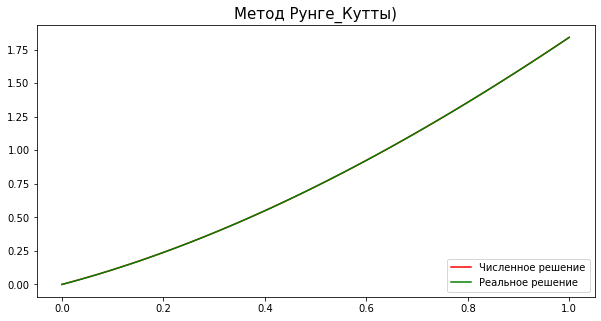

In [11]:
y_r_k_4 = Runge_K_4(odu, start_x, mass_u_u2)[0]

fig = plt.figure(figsize=(10,5))

ax_real = fig.add_subplot()
ax_real.set_title("Метод Рунге_Кутты)", fontsize=15)
ax_real.plot(start_x, y_r_k_4, c='red', label="Численное решение")
ax_real.plot(start_x, start_y, c='green', label="Реальное решение")
ax_real.legend(loc='lower right')

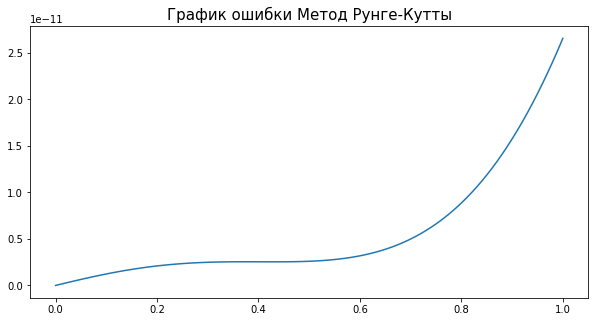

In [12]:
loss_r_k_4 = []
for i in range(len(start_x)):
    loss_r_k_4.append(abs(start_y[i]-y_r_k_4[i]))
    
fig = plt.figure(figsize=(10,5))
ax_real = fig.add_subplot()
ax_real.set_title("График ошибки Метод Рунге-Кутты", fontsize=15)
ax_real.plot(start_x, loss_r_k_4)

## Поправка Рунге

In [19]:
def runge_Euler(odu, start_x_1, mass_u_u2):
    p = 1
    h = start_x_1[3] - start_x_1[2] 
    axis_y = []
    mass_u_u2_ = mass_u_u2

    N_2 = int((FINISH-START)//(h/2))+2
    start_x_2 = np.linspace(START, FINISH, N_2)

    y_euler_1 = Euler(odu, start_x_1, mass_u_u2)
    y_euler_2 = Euler(odu, start_x_2, mass_u_u2_)[::2]

    for i in range(len(y_euler_1)):
        axis_y.append(  y_euler_2[i] + (y_euler_2[i] - y_euler_1[i]) / (2**p - 1)  )  
    return axis_y

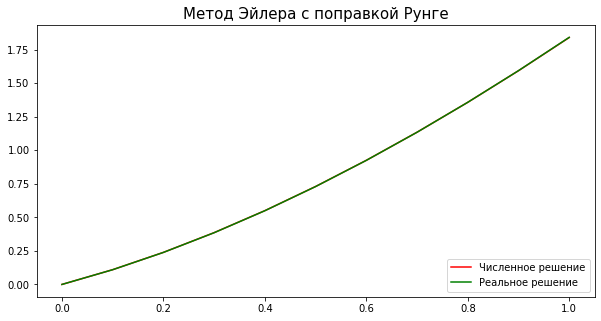

In [21]:
h_1 = 0.1
N_1 = int((FINISH-START)//h_1)+2
start_x_1 = np.linspace(START, FINISH, N_1)
start_y_1 = solution( start_x_1 )

y_euler_runge = runge_Euler(odu, start_x_1, mass_u_u2)

fig = plt.figure(figsize=(10,5))

ax_real = fig.add_subplot()
ax_real.set_title("Метод Эйлера с поправкой Рунге", fontsize=15)
ax_real.plot(start_x_1, y_euler_runge, c='red', label="Численное решение")
ax_real.plot(start_x_1, start_y_1, c='green', label="Реальное решение")
ax_real.legend(loc='lower right')

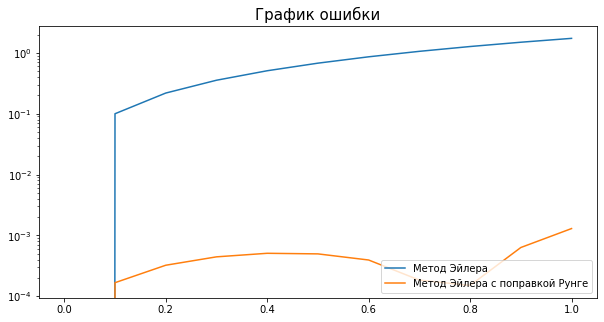

In [23]:
loss_euler = []
loss_euler_runge = []
for i in range(len(start_x_1)):
    loss_euler.append(abs(start_y_1[i]-y_euler[i]))
    loss_euler_runge.append(abs(start_y_1[i]-y_euler_runge[i]))

fig = plt.figure(figsize=(10,5))
ax_real = fig.add_subplot()
ax_real.set_title("График ошибки", fontsize=15)
ax_real.plot(start_x_1, loss_euler, label="Метод Эйлера")
ax_real.plot(start_x_1, loss_euler_runge, label="Метод Эйлера с поправкой Рунге")
ax_real.legend(loc='lower right')
plt.yscale('log')

## Графики

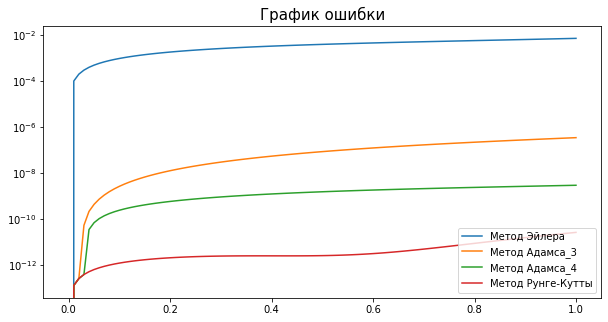

In [24]:
loss_euler = []
loss_r_k_4 = []
loss_adams_3 = []
loss_adams_4 = []
for i in range(len(start_x)):
    loss_euler.append(abs(start_y[i]-y_euler[i]))
    loss_r_k_4.append(abs(start_y[i]-y_r_k_4[i]))
    loss_adams_3.append(abs(start_y[i]-y_adams_3[i]))
    loss_adams_4.append(abs(start_y[i]-y_adams_4[i]))
    
fig = plt.figure(figsize=(10,5))
ax_real = fig.add_subplot()
ax_real.set_title("График ошибки", fontsize=15)
ax_real.plot(start_x, loss_euler, label="Метод Эйлера")
ax_real.plot(start_x, loss_adams_3, label="Метод Адамса_3")
ax_real.plot(start_x, loss_adams_4, label="Метод Адамса_4")
ax_real.plot(start_x, loss_r_k_4, label="Метод Рунге-Кутты")
ax_real.legend(loc='lower right')
plt.yscale('log')
# plt.xscale('log')

График зависимости мах ошибки от шага

In [25]:
def max_loss(predict, real):
  loss = 0
  for i in range(len(predict)):
    if loss < np.abs(real[i]-predict[i]):
      loss = np.abs(real[i]-predict[i])
  return loss

In [28]:
loss_euler = []
loss_r_k_4 = []
loss_adams_3 = []
loss_adams_4 = []
step=[]

hrange = np.arange(0.001,0.1,0.001)
for i in range(len(hrange)):
  hh = hrange[i]
  n = int((FINISH - START)//hh)
  start_xx = np.linspace(START, FINISH, n)
  hh = start_xx[3]-start_xx[2]

  start_yy = solution( start_xx )

  step.append( hh )
  loss_euler.append( max_loss( Euler(odu, start_xx, mass_u_u2), start_yy ))
  loss_adams_3.append( max_loss( Adams_3(odu, start_xx, mass_u_u2), start_yy ))
  loss_adams_4.append( max_loss( Adams_4(odu, start_xx, mass_u_u2), start_yy ))
  loss_r_k_4.append( max_loss( Runge_K_4(odu, start_xx, mass_u_u2)[0], start_yy ))

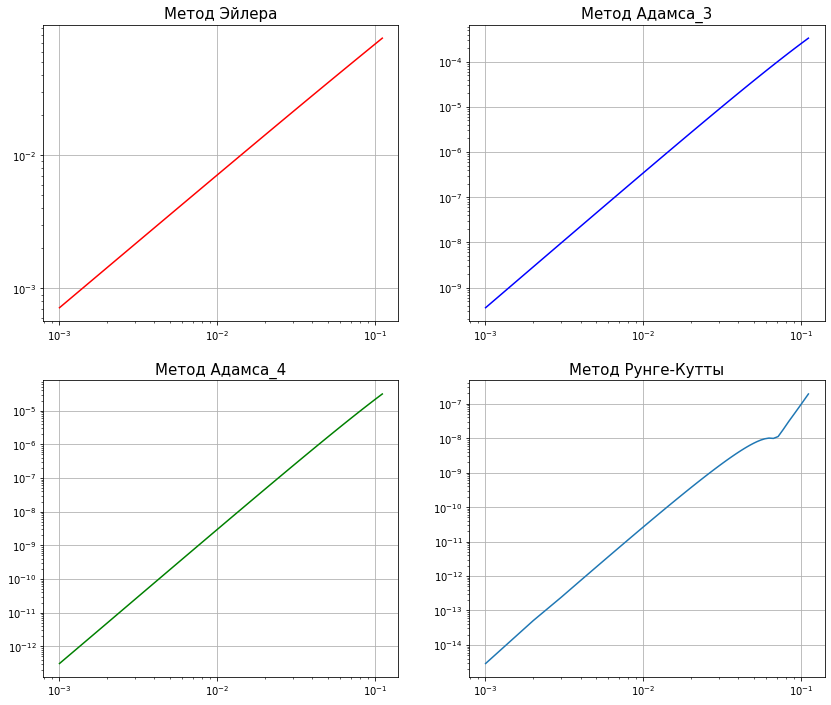

In [29]:
fig = plt.figure(figsize=(14,12))

ax_1 = fig.add_subplot(2,2,1)
ax_1.plot(step, loss_euler, 'r')
ax_1.set_title("Метод Эйлера", fontsize=15)
plt.grid(True)
plt.yscale('log')
plt.xscale('log')

ax_2 = fig.add_subplot(2,2,2)
ax_2.plot(step, loss_adams_3, 'b')
ax_2.set_title("Метод Адамса_3", fontsize=15)
plt.grid(True)
plt.yscale('log')
plt.xscale('log')

ax_3 = fig.add_subplot(2,2,3)
ax_3.plot(step, loss_adams_4, 'g')
ax_3.set_title("Метод Адамса_4", fontsize=15)
plt.grid(True)
plt.yscale('log')
plt.xscale('log')

ax_4 = fig.add_subplot(2,2,4)
ax_4.plot(step, loss_r_k_4)
ax_4.set_title("Метод Рунге-Кутты", fontsize=15)
plt.grid(True)
plt.yscale('log')
plt.xscale('log')